<a href="https://colab.research.google.com/github/Jasmar9/ClasificadorClientesTelecom/blob/master/Notebooks/ClasificadorClientesEmpresaTelecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de Clientes de Empresa de Telecom
Conjunto de Datos de Kaggle [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) enfocado a programas de retención de clientes


# Cargar librerías y funciones

In [1]:
import numpy as np   
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns     

#funciones específicas de Sckit-learn 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
#para exportar el gráfico como archivo.dot
from sklearn.tree import export_graphviz  

#para visualizar el arbol desde el formato .dot
from IPython.display import Image
from pydotplus import graph_from_dot_data


###correlacion()

Esta función llamada `correlacion()` toma como entrada un DataFrame de pandas (`dataframe`) y dos argumentos opcionales: `grafica` y `matrix`. La función calcula la matriz de correlación del DataFrame y, según los valores de `grafica` y `matrix`, produce una visualización gráfica y/o devuelve la matriz de correlación.

1. `dataframe`: Un DataFrame de pandas que contiene las variables numéricas para las que deseas calcular la matriz de correlación.
2. `grafica`: Un argumento booleano opcional (True o False). Si es True (predeterminado), la función genera un mapa de calor que representa la matriz de correlación utilizando la biblioteca seaborn. Si es False, no se muestra ninguna visualización.
3. `matrix`: Un argumento booleano opcional (True o False). Si es True, la función devuelve la matriz de correlación. Si es False (predeterminado), no devuelve ningún valor.

La matriz de correlación es un objeto de pandas que contiene los coeficientes de correlación de Pearson entre cada par de variables numéricas en el DataFrame. Los coeficientes de correlación varían de -1 a 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica ninguna correlación.

Si `grafica=True`, la función crea una figura con un mapa de calor que representa la matriz de correlación. Cada celda del mapa de calor muestra el coeficiente de correlación entre dos variables, con colores que varían de rojo (correlación negativa) a azul (correlación positiva). También se muestra el valor del coeficiente de correlación en cada celda, redondeado a dos decimales.

La función `correlacion()` es útil para explorar y visualizar rápidamente las relaciones lineales entre las variables numéricas en un conjunto de datos.

In [2]:
def correlacion(dataframe, grafica=True, matrix=False):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()                   
    if grafica==True:
      fig = plt.figure(figsize = (25, 20))
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm", 
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

### grafica_roc

In [3]:
def grafica_roc(clf, y_test):
    '''Grafica la curva ROC para el conjunto de prueba'''
    y_test_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve( y_test, y_test_score)
    roc_auc = auc(fpr, tpr)  #Area bajo la curva (AUC, por sus siglas en inglés)
    plt.figure()
    plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % roc_auc)  
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()



# 1. Lectura de datos y breve exploración

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ClasificadorClientesTelecom/master/Datos/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Ver valores únicos de cada variable
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## 2. Preprocesamiento


### Se eliminan las variables innecesarias


In [7]:
df = df.set_index('customerID')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Transformación de variables y manejo de valores nulos

En este código, `errors='coerce'` se utiliza como un argumento en la función `pd.to_numeric()` de la biblioteca pandas. La función `pd.to_numeric()` se utiliza para convertir una serie o columna de un DataFrame de pandas en un tipo de datos numéricos (como 'int' o 'float').

El argumento `errors='coerce'` especifica cómo manejar los errores al realizar la conversión. Cuando se encuentra un valor que no se puede convertir a un número, en lugar de generar un error, este argumento reemplaza dicho valor con NaN (Not a Number), que es una representación estándar de datos faltantes o inválidos en pandas.

Entonces, en este caso, se intenta convertir la columna 'TotalCharges' del DataFrame `df` en una columna numérica. Si encuentra algún valor que no se pueda convertir en un número, lo reemplaza con NaN.

In [8]:
#Convertimos TotalCharges a numérica.
#Revisar para que se utiliza errors='coerce'

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
#¿Cuántos valores nulos quedaron?

print(df['TotalCharges'].isnull().sum())

df[df['TotalCharges'].isnull()]

11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [10]:
#Remplazamos por 0 los valores nulos 
df = df.fillna(value=0)

### Binarización de variables

In [11]:
#Revisamos las categorías y frecuencias de cada variable de tipo "objeto"

df_obj = df.select_dtypes("object")  

for col in df_obj.columns:
    print (col)
    print (df[col].value_counts(),'\n')

gender
Male      3555
Female    3488
Name: gender, dtype: int64 

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport
No                     3473
Yes                    2044
No internet servi

In [12]:
yes_no_columns = [
                  'Partner','Dependents',
                  'PhoneService','PaperlessBilling',
                  'Churn'
                  ]

for i in yes_no_columns:
    df[i].replace(to_replace='Yes', 
                  value=1, inplace=True)
    df[i].replace(to_replace='No', 
                  value=0, inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1


In [13]:
print(df.shape)
print(df.columns)

(7043, 20)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


La función `pd.get_dummies(df)` es parte de la biblioteca pandas y se utiliza para convertir variables categóricas en un formato conocido como "one-hot encoding" o "dummy variables". 

Cuando aplicas `pd.get_dummies(df)` a un DataFrame, la función crea nuevas columnas para cada valor único presente en las columnas categóricas del DataFrame original. Estas nuevas columnas contendrán 1 si el valor categórico está presente en el registro original y 0 si no está presente. El resultado es un nuevo DataFrame con las variables categóricas convertidas en una representación numérica adecuada para muchos algoritmos de análisis de datos y machine learning.

Por ejemplo, supongamos que tienes el siguiente DataFrame:

```
   Color
0   Rojo
1   Azul
2   Verde
```

Al aplicar `pd.get_dummies(df)`, obtendrás el siguiente DataFrame:

```
   Color_Azul  Color_Rojo  Color_Verde
0           0           1            0
1           1           0            0
2           0           0            1
```

Puedes especificar la columna a la que deseas aplicar `pd.get_dummies()` usando la sintaxis `pd.get_dummies(df['column'])` y luego puedes unir el resultado al DataFrame original para mantener todas las columnas en un solo DataFrame.

Ten en cuenta que el uso de `pd.get_dummies()` puede aumentar significativamente el número de columnas en tu conjunto de datos, especialmente si hay muchas categorías únicas en las variables categóricas. En estos casos, podrías considerar técnicas de reducción de dimensionalidad o utilizar enfoques alternativos para codificar variables categóricas, como la codificación ordinal o la codificación por frecuencia.

Antes de aplicar `get_dummies()` a un DataFrame que contiene tanto variables numéricas como categóricas, deberías tener en cuenta los siguientes pasos:

1. **Identifica las variables categóricas:** No todas las variables que están codificadas como números deben tratarse como variables numéricas. Por ejemplo, un código postal está codificado como un número, pero no tiene sentido tratarlo como una variable numérica porque los códigos postales no tienen una relación ordinal o de intervalo. Identifica las variables en tu DataFrame que deben tratarse como variables categóricas.

2. **Limpieza de los datos:** Asegúrate de que tus datos estén limpios antes de aplicar `get_dummies()`. Esto incluye tratar con valores nulos, eliminar o reemplazar outliers y otras tareas de preprocesamiento de datos.

3. **Transformar las variables categóricas:** Algunas variables categóricas pueden tener muchas categorías únicas. En tales casos, aplicar `get_dummies()` puede resultar en un DataFrame muy grande con muchas columnas. Podrías considerar agrupar algunas categorías juntas antes de aplicar `get_dummies()`. Por ejemplo, si tienes una variable de país, podrías agrupar los países por continente.

4. **Selección de variables a codificar:** Para aplicar `get_dummies()` sólo a las columnas categóricas y no a las numéricas, selecciona esas columnas del DataFrame y pasa esa selección a `get_dummies()`. Por ejemplo: `pd.get_dummies(df[categorical_columns])`.

5. **Combina los datos codificados con los datos originales:** Después de aplicar `get_dummies()`, tendrás un nuevo DataFrame con las variables categóricas codificadas. Puedes combinar este DataFrame con el DataFrame original (menos las columnas categóricas) para obtener un DataFrame final que contiene tanto las variables numéricas originales como las variables categóricas codificadas.

Recuerda que `get_dummies()` es útil para la preparación de datos antes del análisis y modelado, pero también puede resultar en un aumento significativo en la cantidad de columnas de tus datos, lo que puede hacer que el modelado sea más complejo. Por lo tanto, es importante considerar cuidadosamente qué variables necesitan ser codificadas de esta manera y si existen otras técnicas de codificación que podrían ser más apropiadas para tus datos y objetivos de modelado.

Cuando se aplica a un DataFrame, por defecto, `get_dummies()` ignorará las columnas numéricas y no las convertirá en variables ficticias.

Las columnas numéricas se mantendrán como están, y solo las columnas con tipos de datos de objeto o categoría serán convertidas en dummies. Por ejemplo, si tienes un DataFrame `df` con columnas numéricas y categóricas, al aplicar `pd.get_dummies(df)`, sólo las columnas categóricas se transformarán en columnas ficticias.

Si tienes variables que son numéricas pero representan categorías (por ejemplo, códigos postales, códigos de área, etc.), deberías convertirlas en tipo de datos de objeto o categoría antes de aplicar `get_dummies()` para que se traten como variables categóricas. 

En resumen, `get_dummies()` no afectará a las variables numéricas en tu DataFrame a menos que las conviertas explícitamente en variables categóricas.


In [14]:
#Utilizamos one-hot encoding para convertir variables categoricos a binarias (con ceros y unos)
df = pd.get_dummies(df)
print(df.shape, '\n', df.columns)

(7043, 42) 
 Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer

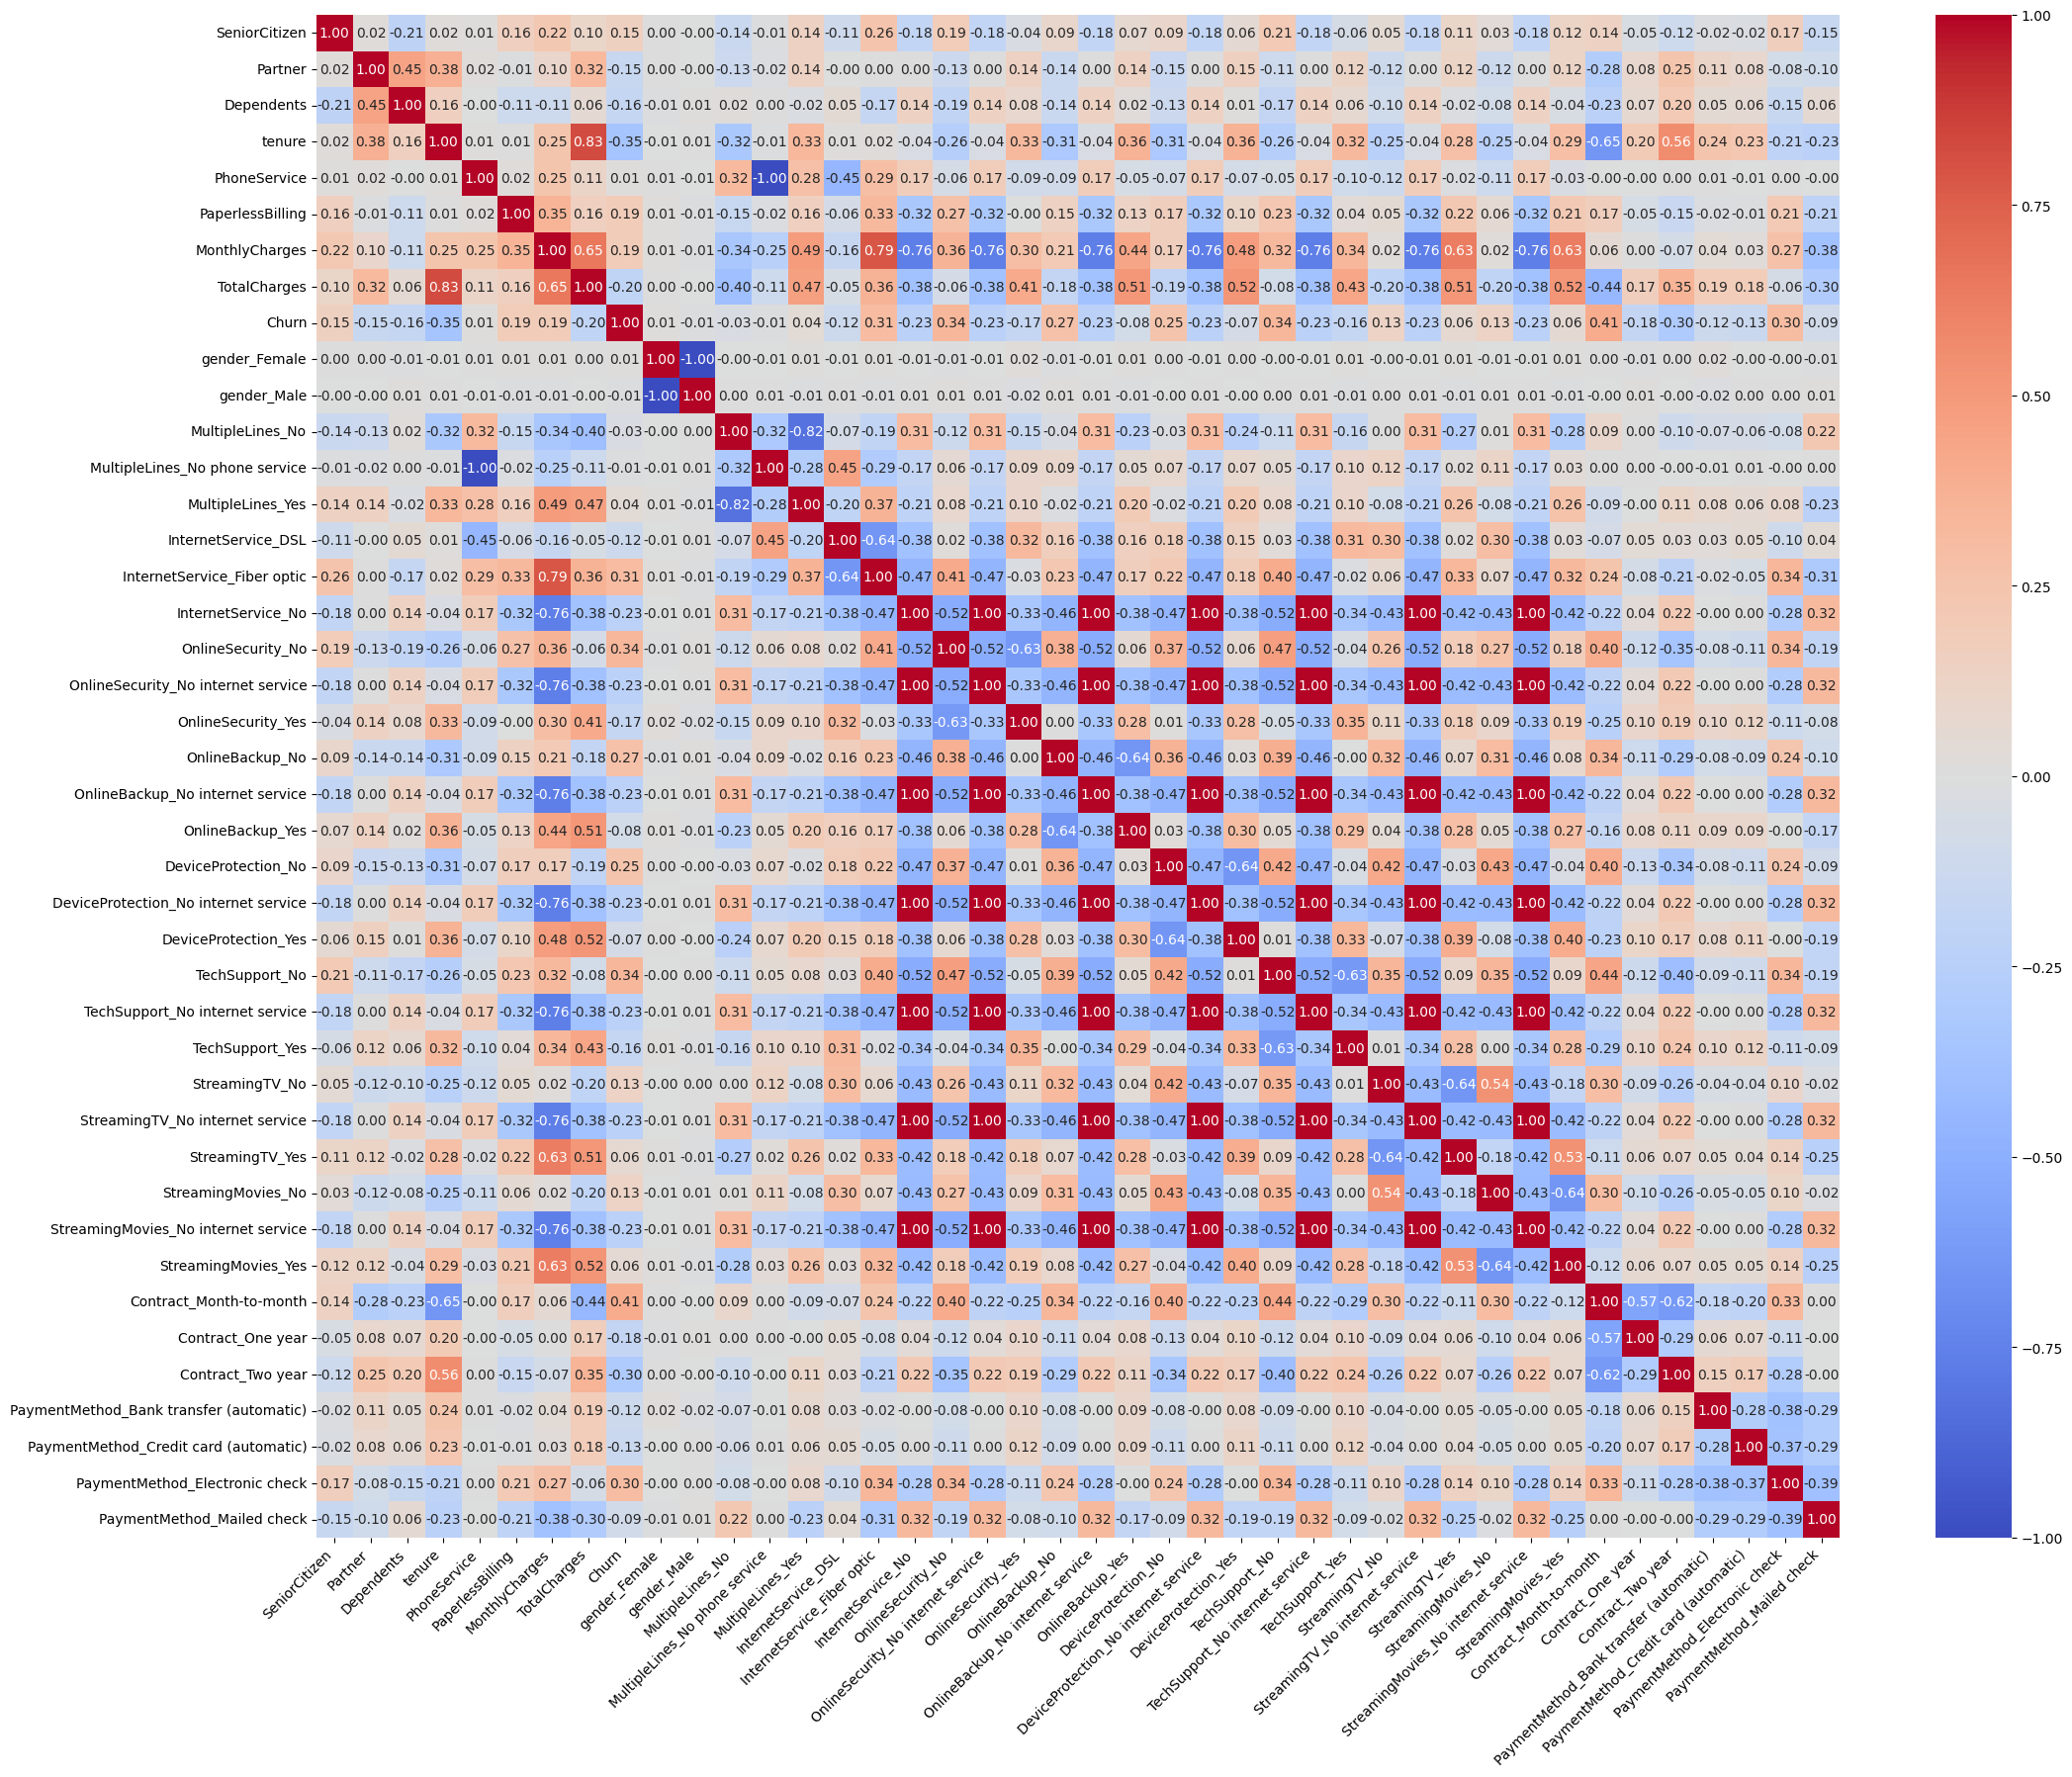

In [15]:
#Detectar variables redundantes 

corr_matrix = correlacion(df, grafica=True, matrix=True)

In [16]:
#Identificar variables redundantes 

# Triangulo superior de la matriz de correlación en números absolutos
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix),1).astype(bool)
triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()


# Encontrar las columnas donde la correlación es 1
borrar = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] > 0.9999999)]
borrar

['gender_Male',
 'MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

Este código utiliza la función `correlacion()` para calcular y visualizar la matriz de correlación de un DataFrame `df`. Luego, se realiza un análisis para identificar columnas con una correlación absoluta de 1 con al menos una otra columna. El objetivo es encontrar pares de columnas que tengan una correlación perfecta (positiva o negativa), lo que podría indicar redundancia en los datos. Vamos a desglosar el código en partes:

1. `corr_matrix = correlacion(df, grafica=True, matrix=True)`: Calcula y visualiza la matriz de correlación del DataFrame `df` utilizando la función `correlacion()`. Guarda la matriz de correlación en la variable `corr_matrix`.

2. `celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix),1).astype(bool)`: Crea una máscara booleana que solo contiene "True" en las celdas que están por encima de la diagonal principal de la matriz de correlación. Esto se hace para evitar comparaciones redundantes, ya que la matriz de correlación es simétrica.

3. `triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()`: Aplica la máscara booleana creada en el paso 2 a la matriz de correlación y calcula el valor absoluto de cada coeficiente de correlación en el triángulo superior de la matriz.

4. `borrar = [column for column in triangulo_sup.columns if any(triangulo_sup[column] > 0.9999999)]`: Crea una lista llamada `borrar` que contiene los nombres de las columnas que tienen al menos un coeficiente de correlación absoluto igual a 1 (O muy cercano, ya que algunas veces python agrega un decimal al valor y podría no ser exacto a 1) con alguna otra columna.

5. `borrar`: Imprime la lista `borrar` con los nombres de las columnas que tienen una correlación perfecta con al menos una otra columna.

Este código es útil para identificar columnas redundantes en un conjunto de datos que podrían ser eliminadas antes de realizar un análisis adicional o aplicar algoritmos de aprendizaje automático.

In [17]:
#eliminar columnas en la lista borrar
df = df.drop(columns = borrar)

#renombrar columna (recordar que 0 sera Male y 1 Female)
df = df.rename(columns = {"gender_Female":"Gender"})  



In [18]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Gender',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
#Llevar columna de clase (Churn) hasta la última posición

cols = df.columns.tolist()

df = df[[c for c in df if c != 'Churn'] + ['Churn']]

print(df.shape)

df.head()

(7043, 34)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Gender,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,1,29.85,29.85,1,0,...,1,0,1,0,0,0,0,1,0,0
5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,1,0,0,0,0,1,0
3668-QPYBK,0,0,0,2,1,1,53.85,108.15,0,1,...,1,0,1,0,0,0,0,0,1,1
7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,1,0,1,0,0,0,0
9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,1,0,0,0,0,1,0,1


In [20]:
print('Número de columnas: ', df.shape[1], '\n') 
print('Número de valores en cada columna: ')
df.nunique()

Número de columnas:  34 

Número de valores en cada columna: 


SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
tenure                                       73
PhoneService                                  2
PaperlessBilling                              2
MonthlyCharges                             1585
TotalCharges                               6531
Gender                                        2
MultipleLines_No                              2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
OnlineSecurity_No                             2
OnlineSecurity_Yes                            2
OnlineBackup_No                               2
OnlineBackup_Yes                              2
DeviceProtection_No                           2
DeviceProtection_Yes                          2
TechSupport_No                          

<Axes: >

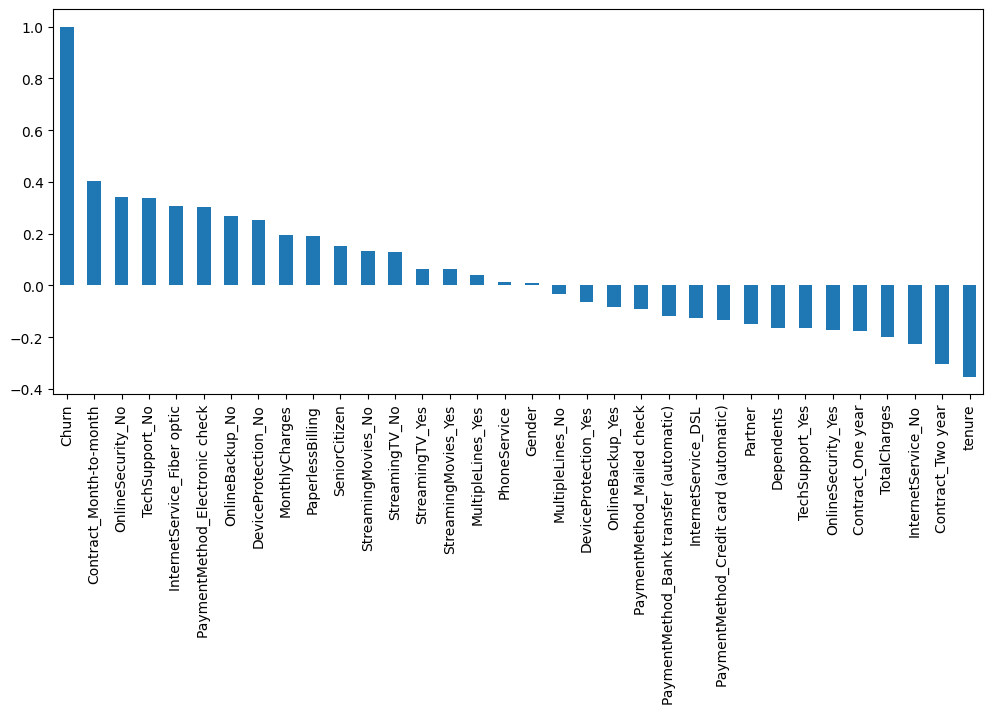

In [21]:
#Correlación de cada variable con Churn
plt.figure(figsize = (12,5))
df.corr()['Churn'].sort_values(ascending = False).plot(kind ='bar',)

# Árbol de Decisión

## Creación de subconjuntos de entrenamiento y prueba 

In [22]:
#Separar las etiquetas del conjunto de datos

Y = df['Churn']
X = df.drop('Churn', axis=1)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=261)


In [24]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("Y: ", Y_train.shape)
print('Clientes que cancelan:{:7.3f}%'.format(Y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("Y: ", Y_test.shape)
print('Clientes que cancelan:{:7.3f}%'.format(Y_test.mean()*100))

TRAINING SET
X:  (4930, 33)
Y:  (4930,)
Clientes que cancelan: 26.572% 

TEST SET
X:  (2113, 33)
Y:  (2113,)
Clientes que cancelan: 26.455%


## Entrenamiento y prueba del modelo

Este código está creando, entrenando y evaluando un modelo de clasificación usando un Árbol de Decisión. A continuación, te explico cada paso:

1. `profundidad = 3`: Esta línea define la profundidad máxima del Árbol de Decisión. La profundidad de un árbol se refiere al número máximo de niveles entre la raíz del árbol y cualquier hoja. Limitar la profundidad del árbol puede ayudar a prevenir el sobreajuste.

2. `clasificador = DecisionTreeClassifier( max_depth=profundidad, criterion="entropy", random_state=0)`: Aquí se crea un nuevo Árbol de Decisión con una profundidad máxima de 3, usando la entropía como criterio para decidir las divisiones en el árbol, y fijando una semilla para la generación de números aleatorios (para reproducibilidad).

3. `clasificador.fit(X_train, Y_train)`: Entrena el modelo de Árbol de Decisión usando los datos de entrenamiento `X_train` y las etiquetas correspondientes `Y_train`.

4. `print("La profundida del árbol es: {}".format(clasificador.get_depth()))`: Imprime la profundidad del árbol después del entrenamiento.

5. `Y_pred_train = clasificador.predict(X_train)`: Usa el modelo entrenado para predecir las etiquetas del conjunto de entrenamiento.

6. `precision_train = accuracy_score(Y_train, Y_pred_train)*100`: Calcula la precisión del modelo en el conjunto de entrenamiento, que es el porcentaje de predicciones correctas.

7. `print("Precisión conjunto de entrenamiento: {:4.2f}%".format(precision_train))`: Imprime la precisión del conjunto de entrenamiento.

8. `Y_pred_test = clasificador.predict(X_test)`: Usa el modelo entrenado para predecir las etiquetas del conjunto de prueba.

9. `precision_test = accuracy_score(Y_test, Y_pred_test)*100`: Calcula la precisión del modelo en el conjunto de prueba, que es el porcentaje de predicciones correctas.

10. `print("Precisión conjunto de prueba: {:4.2f}%".format(precision_test),'\n')`: Imprime la precisión del conjunto de prueba.

En resumen, este código está creando un Árbol de Decisión, entrenándolo con un conjunto de datos, y luego evaluando qué tan bien el modelo puede predecir las etiquetas tanto en los datos de entrenamiento como en los datos de prueba. La precisión en ambos conjuntos de datos te da una idea de qué tan bien se está desempeñando el modelo.

In [25]:
profundidad = 3

#Entrenamiento del modelo
clasificador = DecisionTreeClassifier( max_depth=profundidad,
                                      criterion="entropy", 
                                      random_state=0)
clasificador.fit(X_train, Y_train)

print("La profundida del árbol es: {}".format(clasificador.get_depth()))                          

#Predicción y evaluación sobre el conjunto de entrenamiento
Y_pred_train = clasificador.predict(X_train)
precision_train = accuracy_score(Y_train, Y_pred_train)*100
print("Precisión conjunto de entrenamiento: {:4.2f}%".format(precision_train))

#Predicción y evaluación sobre el conjunto de prueba
Y_pred_test = clasificador.predict(X_test)
precision_test = accuracy_score(Y_test, Y_pred_test)*100
print("Precisión conjunto de prueba: {:4.2f}%".format(precision_test),'\n')


La profundida del árbol es: 3
Precisión conjunto de entrenamiento: 79.19%
Precisión conjunto de prueba: 78.94% 



El atributo `criterion` en `DecisionTreeClassifier` determina la función para medir la calidad de una división en el árbol de decisión. 

Cuando `criterion` se establece en `"entropy"`, el árbol de decisión utiliza el criterio de entropía para seleccionar los atributos que dividen los datos. 

La entropía es una métrica que mide la impureza de la entrada; en otras palabras, mide el grado de "desorden" o "incertidumbre" en nuestros datos. En el contexto de los árboles de decisión, la entropía se utiliza para la selección de atributos: los atributos que resultan en una mayor reducción de la entropía son preferidos.

Aquí está la fórmula para calcular la entropía:

    Entropía(s) = - Σ p_i * log2(p_i)

donde s es un conjunto de instancias y p_i es la proporción de instancias de clase i en s. La suma se realiza sobre todas las clases.

La entropía es 0 si todas las instancias de s pertenecen a la misma clase (es decir, no hay "desorden" en absoluto), y es 1 si las instancias están distribuidas uniformemente entre todas las clases (es decir, hay mucho "desorden"). 

Cuando se está construyendo un árbol de decisión, el algoritmo intentará minimizar la entropía en cada división. Por lo tanto, en cada nodo del árbol, el algoritmo seleccionará el atributo que resulte en la menor entropía (o en otras palabras, el mayor "orden" o certeza) después de la división.

## Ejemplo

Supongamos que tienes un conjunto de datos de 10 animales, con dos clases (perros y gatos) y un atributo (el color de pelo: negro o blanco). 

| Animal | Color de pelo |
|--------|---------------|
| Perro  | Negro         |
| Perro  | Negro         |
| Perro  | Negro         |
| Perro  | Blanco        |
| Perro  | Blanco        |
| Gato   | Negro         |
| Gato   | Negro         |
| Gato   | Blanco        |
| Gato   | Blanco        |
| Gato   | Blanco        |

Estamos tratando de decidir si debemos dividir estos datos por color de pelo o no. Primero, calculamos la entropía antes de la división.

Tenemos 5 perros y 5 gatos, así que la probabilidad de perro es 0.5 y la probabilidad de gato también es 0.5. 

La entropía antes de la división es:

    Entropía = -0.5*log2(0.5) - 0.5*log2(0.5) = 1

Luego, calculamos la entropía si dividimos por el color de pelo.

Si dividimos por color de pelo, obtenemos dos conjuntos de datos:

Negro:
- 3 perros
- 2 gatos

Blanco:
- 2 perros
- 3 gatos

La entropía del conjunto de datos negro es:

    Entropía(negro) = -0.6*log2(0.6) - 0.4*log2(0.4) ≈ 0.97

La entropía del conjunto de datos blanco es:

    Entropía(blanco) = -0.4*log2(0.4) - 0.6*log2(0.6) ≈ 0.97

La entropía después de la división es un promedio ponderado de las entropías de cada conjunto de datos, así que:

    Entropía después de la división = 0.5*Entropía(negro) + 0.5*Entropía(blanco) = 0.97

En este caso, como la entropía después de la división (0.97) es menor que la entropía antes de la división (1), podemos concluir que dividir por el color de pelo es una buena decisión.

Este es un ejemplo muy simplificado. En la práctica, puedes tener muchos atributos y muchas clases, y el algoritmo del árbol de decisión tiene que decidir qué atributo es el mejor para dividir en cada nodo del árbol. Pero el principio básico sigue siendo el mismo: se prefiere la división que reduce la entropía.

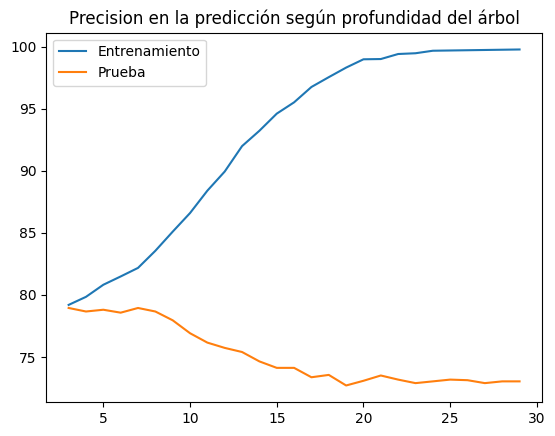

In [26]:
#Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
Y_pred_train = {}
Y_pred_test = {}
precision_train={}
precision_test = {}

for p in range(3,30):
  #Entrenamiento del modelo
  clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy", 
                               random_state = 0).fit(X_train, Y_train)                        

  #Predicción y evaluación sobre el conjunto de entrenamiento
  Y_pred_train[p] = clf[p].predict(X_train)
  precision_train[p] = accuracy_score(Y_train, Y_pred_train[p])*100

  #Predicción y evaluación sobre el conjunto de prueba
  Y_pred_test[p] = clf[p].predict(X_test)
  precision_test[p] = accuracy_score(Y_test, Y_pred_test[p])*100

precision = pd.DataFrame( {'Entrenamiento':precision_train,
                           'Prueba': precision_test})

precision.plot.line(
    title ='Precision en la predicción según profundidad del árbol')
plt.show()

Este script está creando, entrenando y evaluando una serie de modelos de árbol de decisión, cada uno con una profundidad máxima diferente. La profundidad máxima del árbol varía desde 3 hasta 29, tal como se especifica en el bucle for. 

En resumen, esto es lo que hace cada parte del código:

1. **Inicialización de diccionarios**: Se crean varios diccionarios para almacenar los clasificadores (`clf`), las predicciones en los datos de entrenamiento (`Y_pred_train`) y prueba (`Y_pred_test`), y las precisiones en los datos de entrenamiento (`precision_train`) y prueba (`precision_test`) para cada profundidad del árbol.

2. **Bucle for**: Este bucle se ejecuta para cada valor de profundidad desde 3 hasta 29 (ambos inclusive). 

    - En cada iteración del bucle, se crea un nuevo árbol de decisión con la profundidad máxima actual (`p`) y se entrena con los datos de entrenamiento (`X_train`, `Y_train`). El árbol entrenado se almacena en el diccionario `clf`.
   
    - Luego, el árbol de decisión se utiliza para predecir las etiquetas tanto en los datos de entrenamiento como en los datos de prueba. Estas predicciones se almacenan en los diccionarios `Y_pred_train` y `Y_pred_test`, respectivamente.

    - Después, se calcula la precisión del modelo en los datos de entrenamiento y de prueba, y estas precisiones se almacenan en los diccionarios `precision_train` y `precision_test`, respectivamente.

3. **Creación del DataFrame de precisión**: Se crea un DataFrame de pandas que contiene las precisiones de los modelos en los datos de entrenamiento y de prueba para cada profundidad del árbol.

4. **Graficación de la precisión**: Por último, se grafican las precisiones de los modelos en los datos de entrenamiento y de prueba en función de la profundidad del árbol.

El objetivo de este script es determinar cómo la profundidad máxima del árbol afecta el rendimiento del modelo en los datos de entrenamiento y de prueba. Esto puede ayudar a entender si el modelo está sobreajustando o subajustando los datos y a elegir un valor adecuado para la profundidad máxima del árbol.

In [27]:
precision

,Entrenamiento,Prueba
3,79.188641,78.939896
4,79.837728,78.655939
5,80.811359,78.797918
6,81.480730,78.561287
7,82.170385,78.939896
8,83.549696,78.655939
9,85.091278,77.946048
10,86.592292,76.904875
11,88.397566,76.147657
12,89.939148,75.721723


## Visualización del árbol de decisión

Este código crea una imagen de un árbol de decisión entrenado utilizando la biblioteca de visualización `graphviz`. Aquí está el desglose de lo que está sucediendo:

1. Primero, utiliza la función `export_graphviz` de la biblioteca `sklearn.tree` para convertir el modelo de árbol de decisión `clf[3]` en datos de formato DOT, que es un formato de archivo gráfico utilizado por `graphviz`.

   Los argumentos de esta función son los siguientes:
   - `clf[3]`: Este es el modelo de árbol de decisión que se va a visualizar. En este caso, es el modelo almacenado en el diccionario `clf` con la clave 3, que corresponde al árbol con profundidad máxima de 3.
   - `rounded=True, filled=True`: Estos argumentos hacen que los nodos del árbol se dibujen con bordes redondeados y rellenos de color.
   - `special_characters=True`: Permite la inclusión de caracteres especiales en las etiquetas de los nodos.
   - `feature_names=X.columns`: Este argumento define los nombres que se utilizarán para las características en la visualización. En este caso, son los nombres de las columnas del DataFrame `X`.
   - `max_depth=3`: Limita la profundidad del árbol visualizado a 3 niveles.
   - `class_names=['non-churners', 'churners']`: Define los nombres de las clases que se utilizarán en la visualización.

2. Luego, utiliza la función `graph_from_dot_data` de la biblioteca `graphviz` para convertir los datos DOT en un gráfico.

3. Finalmente, utiliza el método `create_png` para generar una imagen PNG del gráfico. La función `Image` de la biblioteca `IPython.display` se utiliza para mostrar la imagen en el cuaderno Jupyter.

Nota: `export_graphviz` y `graph_from_dot_data` son funciones que podrían requerir que instales las bibliotecas correspondientes (`sklearn` y `graphviz`, respectivamente) si aún no las tienes.

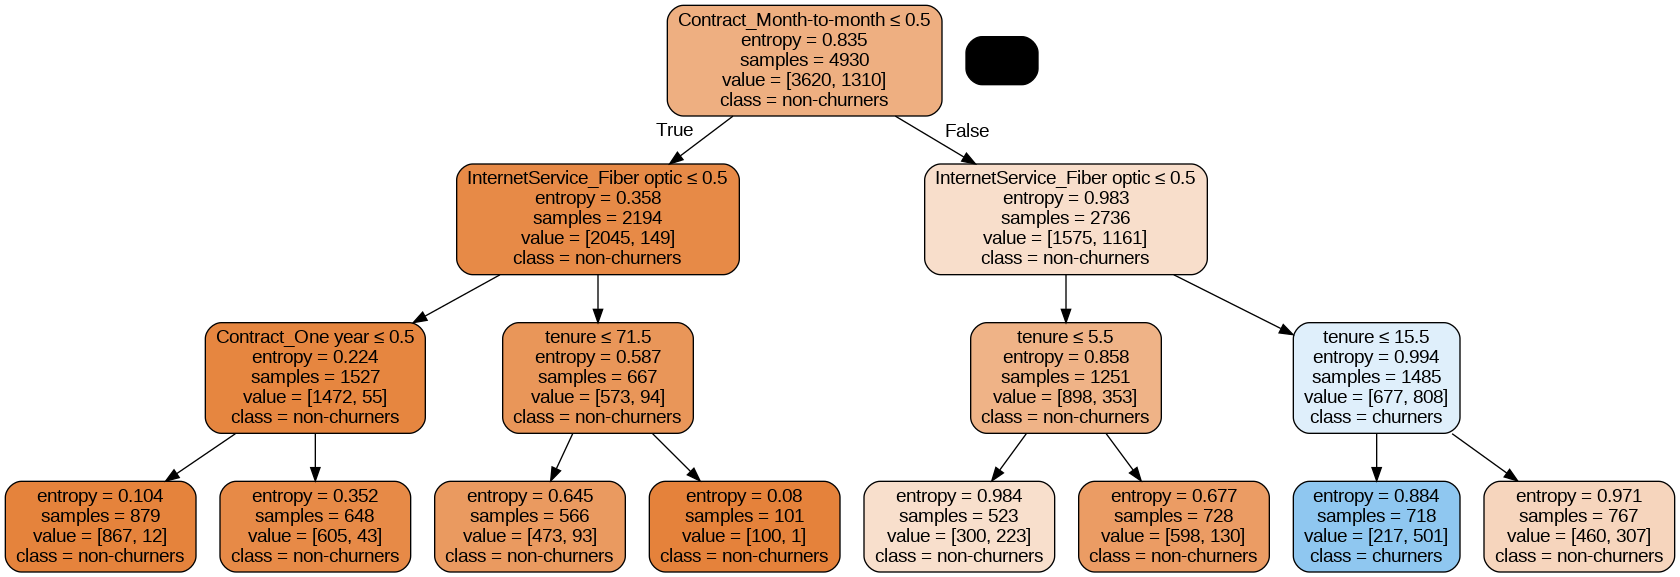

In [28]:
#Método 1 para graficar el arbol exportando el arbol como un archivo .dot

dot_data = export_graphviz(clf[3], rounded = True, 
                           filled = True, 
                           special_characters = True, 
                           feature_names = X.columns,
                           max_depth = 3,
                           class_names = ['non-churners','churners'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png( ))

In [29]:
clf[3].feature_importances_.sum()

0.9999999999999999

## Importancia de cada variable de acuerdo al modelo

Este código genera una gráfica de barras horizontal que muestra la importancia de las características del modelo de árbol de decisión `clf[8]`, es decir, el modelo con una profundidad máxima de 8.

Esto es lo que hace cada parte del código:

1. **Creación de la serie de pesos**: La propiedad `feature_importances_` del modelo de árbol de decisión devuelve un arreglo que contiene la importancia relativa de cada característica. Este arreglo se convierte en una Serie de pandas, donde el índice de la serie se establece como los nombres de las características, que se obtienen de `X.columns.values`.

2. **Ordenamiento de la serie**: La función `sort_values` se utiliza para ordenar la serie de pesos en orden ascendente. Esto significa que las características menos importantes aparecerán en la parte superior de la gráfica y las más importantes en la parte inferior.

3. **Generación de la gráfica**: Finalmente, la función `plot` se utiliza para generar una gráfica de barras horizontal de la serie de pesos. El argumento `kind='barh'` especifica que se debe generar una gráfica de barras horizontal, y el argumento `figsize=(15, 10)` especifica el tamaño de la gráfica.

La gráfica resultante muestra la importancia de cada característica en la decisión del árbol. Las barras más largas corresponden a las características más importantes, es decir, las que más contribuyeron a las decisiones del árbol.

<Axes: >

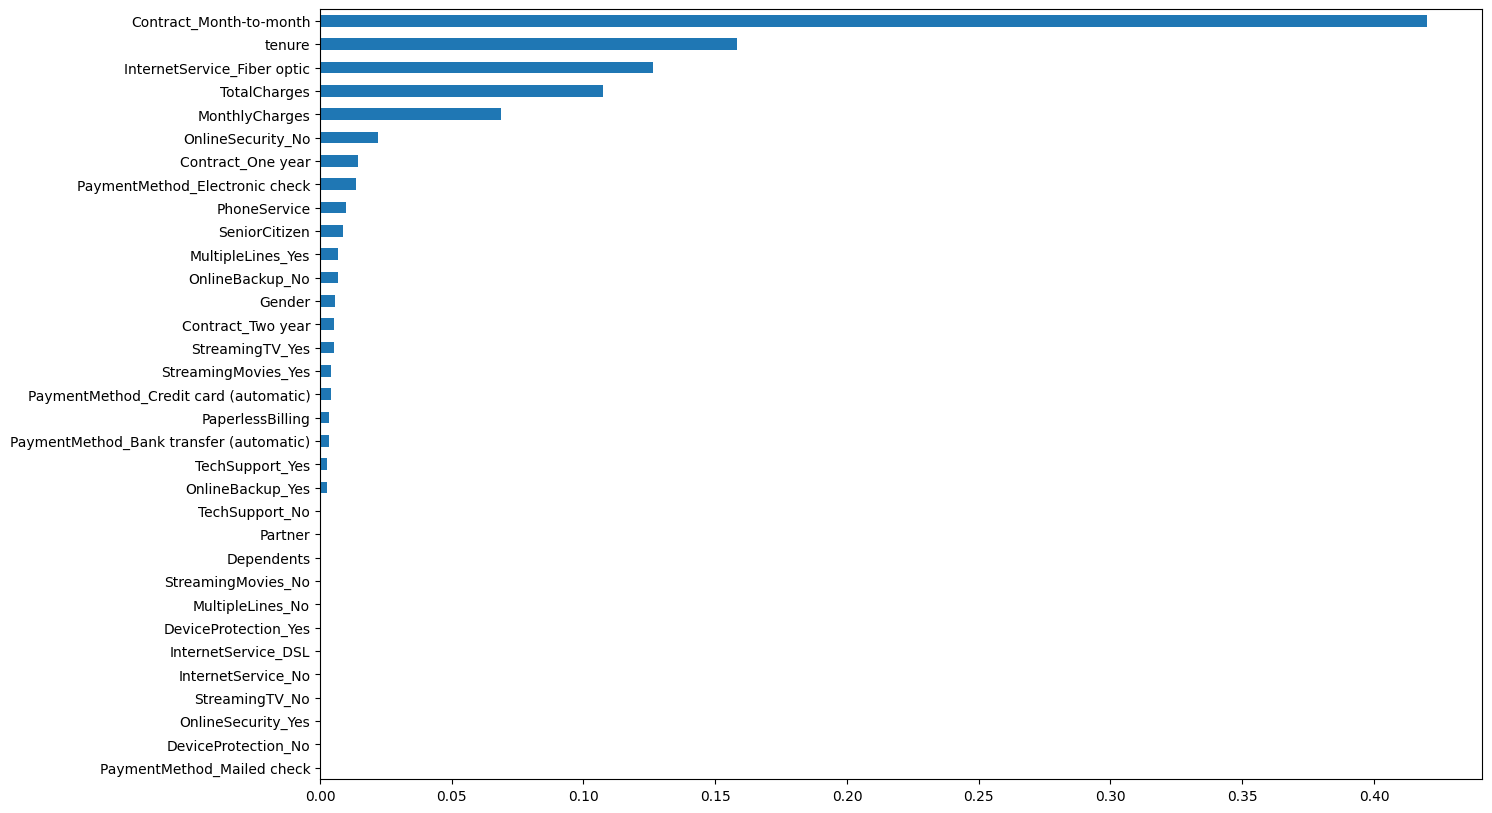

In [30]:
weights = pd.Series(clf[7].feature_importances_,
                    index=X.columns.values)

weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

## Evaluació del modelo Matriz de confusión

**Matriz de confusión**

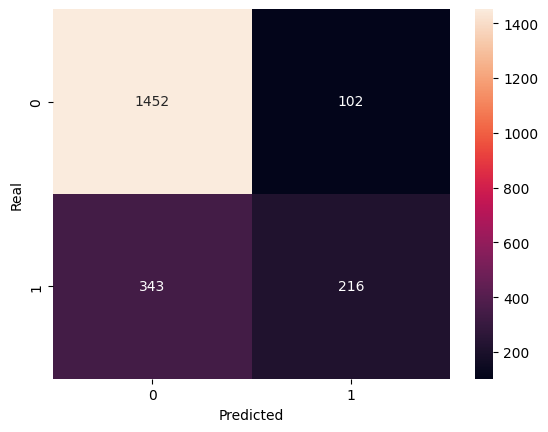

In [31]:
#Matriz de confusión

import seaborn as sns

data = {'Y_Real':  Y_test,
        'Y_Prediccion': Y_pred_test[3]
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


###**[Curva ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)**

* eje x ----  Specificity (proporción de falsos positivos (*fpr*) )
* eje y ----  Recall/Sensitivity (proporción de verdaderos positivos (*tpr*))



In [32]:
clf[7].predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
print(clf[7].predict_proba(X_test))

[[0.32307692 0.67692308]
 [0.7480315  0.2519685 ]
 [0.60824742 0.39175258]
 ...
 [0.98780488 0.01219512]
 [0.88125    0.11875   ]
 [0.57142857 0.42857143]]


In [34]:
umbral = 0.35 # por arriba del cual se clasificaría como clase 1
prediccion_test = np.where( clf[7].predict_proba(X_test)[:, 1] > umbral, 1, 0)
prediccion_test

array([1, 0, 1, ..., 0, 0, 1])

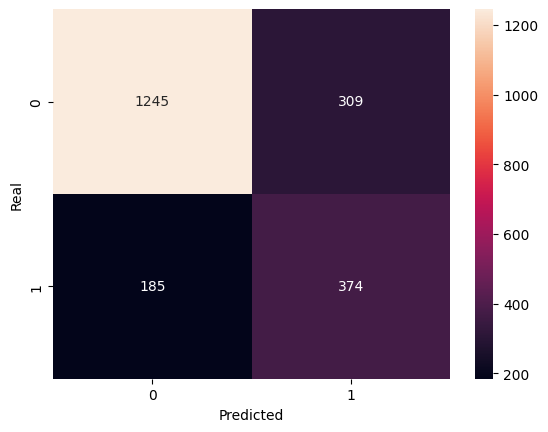

In [35]:
data = {'Y_Real':  Y_test,
        'Y_Prediccion': prediccion_test
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

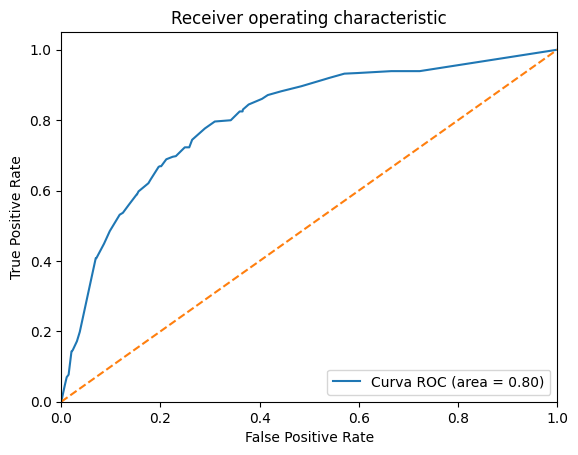

In [36]:
grafica_roc(clf[7], Y_test)


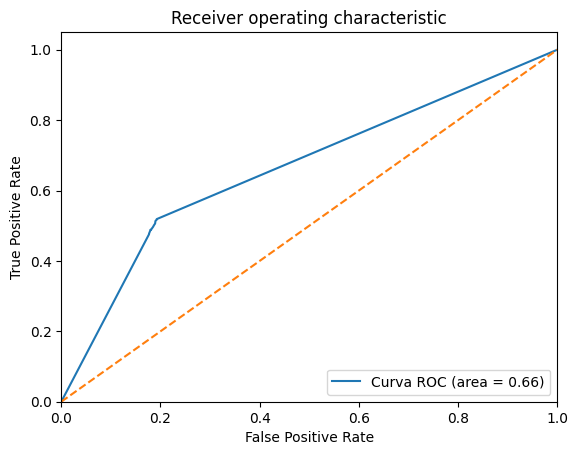

In [37]:
grafica_roc(clf[20], Y_test)

# Bosque Aleatorio

## Entrenamiento y prueba


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0, 
                                criterion='entropy').fit(X_train, Y_train)


Y_pred = clf_rf.predict(X_test)
print("Precisión del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(Y_test, Y_pred)*100))


Precisión del modelo Bosque Aleatorio en el conjunto de prueba: 77.95%


<Axes: >

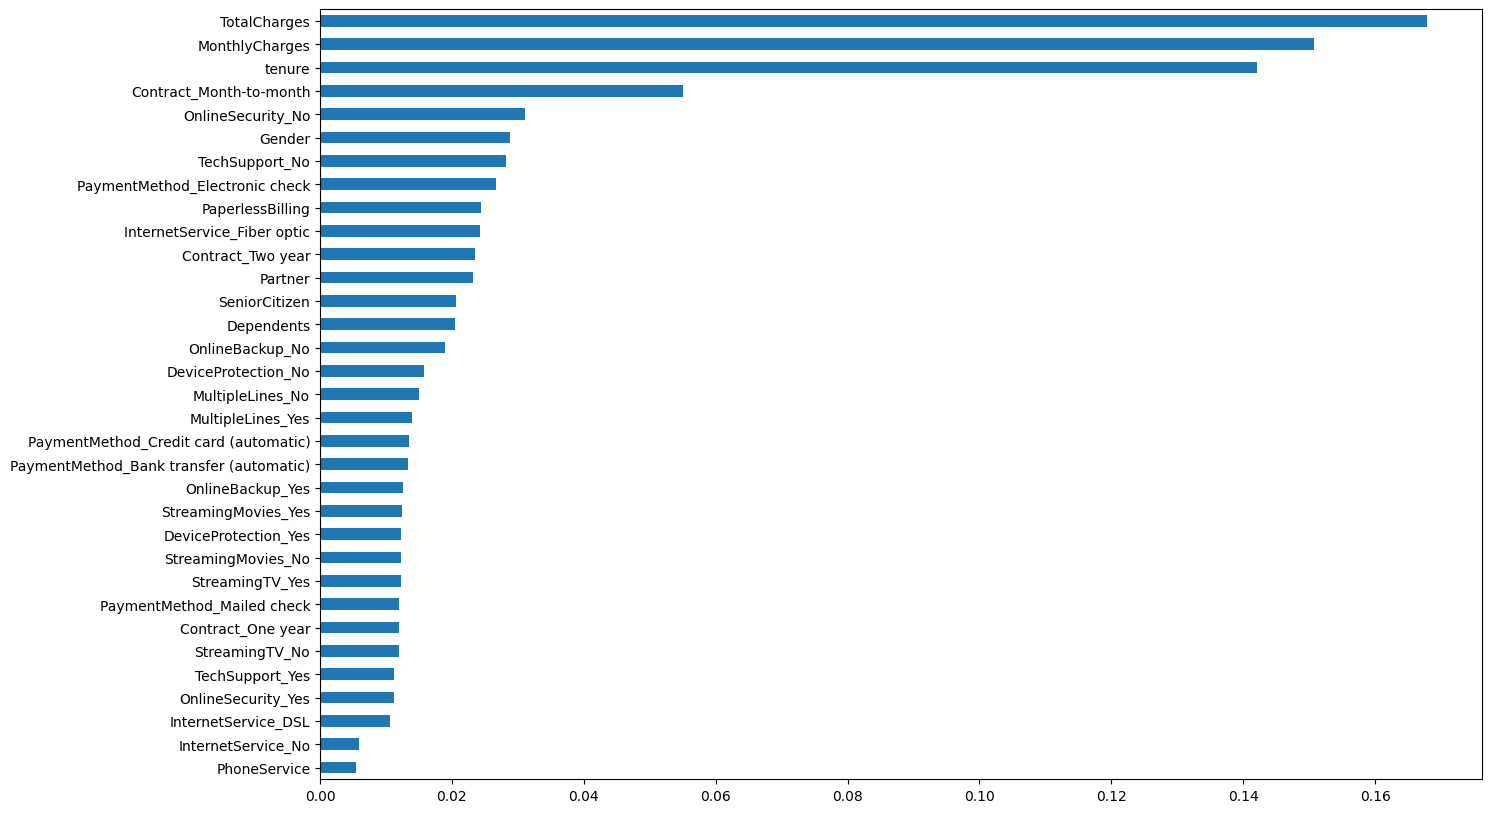

In [40]:
importances = clf_rf.feature_importances_
weights = pd.Series(importances,
                    index=X.columns.values)
weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

In [41]:
weights.sum()

1.0000000000000002

In [42]:
clf_rf.predict_proba(X_test)

array([[0.287, 0.713],
       [0.635, 0.365],
       [0.638, 0.362],
       ...,
       [0.883, 0.117],
       [0.825, 0.175],
       [0.62 , 0.38 ]])